In [62]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [63]:
img=cv2.imread("imori.jpg").copy()

In [64]:
def Save(img,name):
    if cv2.imwrite(f"{name}.jpg",img):
        print("True")
        
def showhist(img,s):
    out=img.copy()
    plt.hist(out.ravel(),bins=255,range=(0,255),rwidth=0.8)
    plt.xlabel("value")
    plt.ylabel("nums")
    plt.savefig(f'{s}.png')
    plt.show()

In [34]:
def Affine_sharing(img,dx=0.,dy=0.):
    H,W,C=img.shape
    H_new=H+int(dy)
    W_new=W+int(dx)
    x=np.arange(W_new)
    y=np.arange(H_new)
    a=1.
    b=dx/H
    c=dy/W
    d=1.
    ab_cd=a*d-b*c
    xout,yout=np.meshgrid(x,y)
    
    xin=(d*xout-b*yout)/ab_cd
    yin=(-c*xout+a*yout)/ab_cd
    
    out=np.zeros((H_new,W_new,C))
    ind=np.where((xin<W)&(xin>=0)&(yin<H)&(yin>=0))
    tmp=img.copy()
    out[ind]=tmp[yin[ind].astype(np.int),xin[ind].astype(np.int)]
    
    out=out.astype(np.uint8)
    return out

In [35]:
ans1=img.copy()
ans1_1=Affine_sharing(ans1,dx=30)
Save(ans1_1,"ans1_1")
ans1_2=Affine_sharing(ans1,dy=30)
Save(ans1_2,"ans1_2")
ans1_3=Affine_sharing(ans1,dx=30,dy=30)
Save(ans1_3,"ans1_3")

True
True
True


In [118]:
def DFT(img):
    H,W,C=img.shape
    G=np.zeros_like(img,dtype=np.complex)
    indx=np.arange(W)
    indy=np.arange(H)
    x,y=np.meshgrid(indx,indy)
    
    for c in range(C):
        for k in range(W):
            for l in range(H):
                G[l,k,c]=np.sum(img[...,c]*np.exp(-2j*np.pi*(k*x/W+l*y/H)))
    G/=np.sqrt(H*W)
    
    return G

def IDFT(G):
    H,W,C=G.shape
    out=np.zeros_like(G,dtype=np.float32)
    indx=np.arange(W)
    indy=np.arange(H)
    k,l=np.meshgrid(indx,indy)
    
    for c in range(C):
        for  x in range(W):
            for y in range(H):
                out[y,x,c]=np.abs(np.sum(G[...,c]*np.exp(2j*np.pi*(k*x/W+l*y/H))))
    out/=H*W
    
    return out

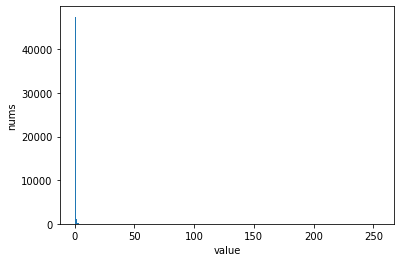

True


In [119]:
ans2=img.copy()
G=DFT(ans2.copy())
ps=(np.abs(G)/np.abs(G).max()*255).astype(np.uint8)
showhist(ps,"ans2pshist")
Save(ps,"ans2psimg")

In [120]:
ans2original=IDFT(G)
ans2original=(np.abs(ans2original)/np.abs(ans2original).max()*255).astype(np.uint8)
Save(ans2original,"ans2original")

True


In [121]:
def LowpassFilter(img):
    pass